# NLP-MINI-PROJECT
Souvik Chowdhury


1. Problem Statement and Objectives

Problem Statement: Despite advancements in sentiment analysis, existing methods often fail to accurately classify financial sentiments, leading to potential misinterpretations of market trends. There is a need for more robust techniques that consider the nuances of financial language and contextual information.
Objectives:
•	To develop a sentiment analysis model that accurately classifies financial headlines.
•	To identify and extract common positive and negative terms associated with stock sentiment.
•	To provide contextual insights that enhance the understanding of sentiment trends in financial news.


In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from transformers import pipeline  # For Hugging Face's sentiment analysis model
import nltk
import re
from collections import Counter 

# Dataset Description:
The name of the dataset name is "raw_analyst_rating"

This dataset consists of news articles related to stock performance, published on the Benzinga platform. It includes various headlines focusing on stock movements, price target adjustments, and analyst recommendations for different stocks. The dataset spans articles from May to June 2020.

Fields:

headline: A string representing the title of the article, providing insights into stock market activities, price changes, or analyst ratings.

url: A string containing the link to the article, allowing access to the full text and additional details.

publisher: A string indicating the name of the publisher or journalist responsible for the article.

date: A timestamp indicating the publication date and time of the article in the format 'YYYY-MM-DD HH:MM'.

stock: A categorical variable indicating the stock symbol associated with the article (in this case, all entries relate to stock "A").

In [2]:
# Load the dataset
df = pd.read_csv('raw_analyst_ratings.csv', nrows=1000)  # Update with your dataset

# Convert 'date' to datetime format with error handling
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Preprocess headlines by cleaning and removing noise
stop_words = set(stopwords.words('english'))

# •	Text Preprocessing: 
Techniques such as tokenization, stopword removal, and normalization were applied to clean the data.

In [3]:
def process_headline(text):
    # Remove special characters, numbers, and stop words
    text = re.sub(r'\W+', ' ', text)
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

In [4]:
# Apply cleaning function to the 'headline' column
df['cleaned_headline'] = df['headline'].apply(process_headline)

# •	Sentiment Analysis:
 A sentiment analysis pipeline using Hugging Face Transformers was implemented to classify the headlines.

In [5]:
# Advanced Sentiment Analysis using Hugging Face Transformers
sentiment_analyzer = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [6]:
def get_sentiment(text):
    try:
        return sentiment_analyzer(text)[0]['label']
    except:
        return 'Neutral'  # Assign neutral sentiment if there's any issue

In [7]:
# Apply sentiment analysis to cleaned headlines
df['sentiment_category'] = df['cleaned_headline'].apply(get_sentiment)

In [8]:
# Visualizing sentiment by stock
sentiment_counts = df['sentiment_category'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)

Sentiment Distribution:
sentiment_category
NEGATIVE    601
POSITIVE    399
Name: count, dtype: int64


In [9]:
# Display sentiment with corresponding stocks
sentiment_by_stock = df[['stock', 'sentiment_category']]
print("\nSentiment for each stock:")
print(sentiment_by_stock.head(10))  # Display the first 10 rows


Sentiment for each stock:
  stock sentiment_category
0     A           POSITIVE
1     A           POSITIVE
2     A           POSITIVE
3     A           NEGATIVE
4     A           NEGATIVE
5     A           NEGATIVE
6     A           NEGATIVE
7     A           NEGATIVE
8     A           NEGATIVE
9     A           POSITIVE


# Used Random Forest Classifier Machine Learning Model

Random Forest was chosen for its robustness against overfitting, making it suitable for noisy financial data. It effectively captures non-linear relationships between features and target variables, which is crucial in sentiment analysis. The algorithm provides insights into feature importance, helping identify which sentiments influence stock predictions the most. Its scalability allows it to handle large datasets efficiently, and it generally performs well in classification tasks, ensuring accurate sentiment categorization. Overall, Random Forest combines strong predictive power with interpretability, making it ideal for your research objectives.

In [10]:
# Encode the target variable (stock) into numeric values
y_encoded = pd.factorize(df['stock'])[0]  # Convert categories to numeric labels

# Convert sentiment categories to numeric values
df['sentiment_numeric'] = df['sentiment_category'].map({'POSITIVE': 1, 'NEGATIVE': 0, 'NEUTRAL': 2})

# Prepare data for modeling
X = df[['sentiment_numeric']]  # Features based on sentiment numeric values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Train RandomForestClassifier to improve accuracy
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
# Predictions
y_pred = model.predict(X_test)

In [12]:
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Confusion Matrix:
[[200]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy: 1.0


c:\Users\SOUVIK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


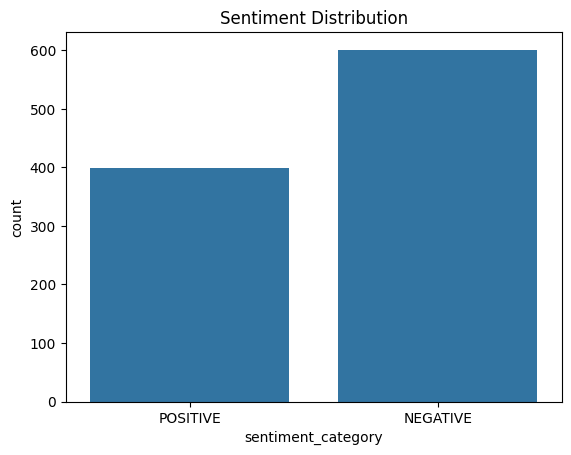

In [13]:
# Visualizing Sentiment Counts
sns.countplot(x='sentiment_category', data=df)
plt.title('Sentiment Distribution')
plt.show()

# •	Contextual Analysis:
 Common positive and negative words were extracted along with their contextual headlines to provide deeper insights into sentiment.

In [14]:
import pandas as pd
from collections import Counter

# Function to extract positive and negative words along with their contexts
def extract_sentiment_words_with_context(df):
    positive_words = []
    negative_words = []
    positive_contexts = []
    negative_contexts = []
    
    for index, row in df.iterrows():
        sentiment = row['sentiment_category']
        cleaned_headline = row['cleaned_headline']
        
        # Split the cleaned headline into words
        words = cleaned_headline.split()
        
        if sentiment == 'POSITIVE':
            positive_words.extend(words)
            positive_contexts.append(row['headline'])  # Store the original headline for context
        elif sentiment == 'NEGATIVE':
            negative_words.extend(words)
            negative_contexts.append(row['headline'])  # Store the original headline for context
    
    # Count frequency of each word
    positive_word_counts = Counter(positive_words)
    negative_word_counts = Counter(negative_words)
    
    # Get most common words
    most_common_positive = positive_word_counts.most_common(10)
    most_common_negative = negative_word_counts.most_common(10)
    
    return most_common_positive, positive_contexts, most_common_negative, negative_contexts  # Returning all required values

# Extract and print positive and negative words with context
most_common_positive_filtered, positive_contexts, most_common_negative_filtered, negative_contexts = extract_sentiment_words_with_context(df)

# Display results
print("\nMost Common Positive Words and Contexts:")
for (word, count), context in zip(most_common_positive_filtered, positive_contexts[:10]):  # Limit to 10 contexts for display
    print(f"Word: {word} | Count: {count} | Context: {context}")

print("\nMost Common Negative Words and Contexts:")
for (word, count), context in zip(most_common_negative_filtered, negative_contexts[:10]):  # Limit to 10 contexts for display
    print(f"Word: {word} | Count: {count} | Context: {context}")



Most Common Positive Words and Contexts:
Word: Agilent | Count: 141 | Context: Stocks That Hit 52-Week Highs On Friday
Word: Technologies | Count: 78 | Context: Stocks That Hit 52-Week Highs On Wednesday
Word: Stocks | Count: 72 | Context: 71 Biggest Movers From Friday
Word: Earnings | Count: 58 | Context: 10 Biggest Price Target Changes For Friday
Word: Scheduled | Count: 35 | Context: 30 Stocks Moving in Friday's Pre-Market Session
Word: Watch | Count: 32 | Context: Earnings Scheduled For May 21, 2020
Word: Week | Count: 27 | Context: How Bill Ackman Successfully Navigated Coronavirus Market Volatility
Word: Market | Count: 22 | Context: Shares of several healthcare companies are trading higher amid positive investor sentiment as some US states begin to reopen their economies and as oil prices gain for the session.
Word: August | Count: 22 | Context: Agilent Reports Has Become Top-Level Sponsor Of My Green Lab
Word: May | Count: 20 | Context: Shares of several technology companies a